In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import math as mt


games=pd.read_csv('/datasets/games.csv')

Começo importando a tabela e gerando as principais informações dela. 

In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.tail(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,NaN,tbd,E
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Vejo se há valores nulos. Algumas colunas possuem valores ausentes. Entretanto, decidi não os preencher, pois acabam não impactando a análise. As colunas que possuem mais valores nulos são de classificação ESBR, pontuação da crítica e usuário. Como cada jogo é diferente do outro, não faz sentido usar informações de outros jogos para estimar esses valores nulos.

In [6]:
games.isna().mean()*100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [7]:
games.duplicated().sum()

0

Não há linhas duplicadas

Transformando as colunas do dataframe em letras minúsculas. 

In [8]:
games.columns = games.columns.str.lower()

Convertendo os dados para os tipos necessários. Converti a coluna user_score em float para uma melhor análise posterior. Tive que anular os valores ‘tbd’ em user_score para fazer a conversão. Os valores ‘tbf’ não trazem nenhuma informação relevante ao estudo.  

In [9]:
games[games['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [10]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [11]:
games.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411,-0.267851
na_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755,0.086200
eu_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752,0.055337
jp_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593,0.125598
other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554,0.057119
critic_score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000,0.580878
user_score,-0.267851,0.086200,0.055337,0.125598,0.057119,0.580878,1.000000


In [12]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
games['year_of_release'] = games['year_of_release'].fillna(0)

In [15]:
games['year_of_release'] = games['year_of_release'].astype('int')

Converti a coluna 'year_of_release' em int por se tratar de anos. Não há necessidade de ser float. Troquei os valores nulos dessa coluna por 0.   

In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [17]:
games['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [18]:
games['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Aqui criei uma coluna nova com a Receita total das vendas de cada jogo. 

In [19]:
games['total_vendas'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']  

Como solicitado criei tabela dinâmica agregando por ano de lançamento de cada jogo. Apesar da amostra começar em 1980, somente em 1994 temos mais de 100 jogos lançados em um ano. A partir de 2002 esse número aumenta bastante (829) até chegar ao topo em 2008 (recorde de 1427 jogos). 

In [20]:
games_year_of_release = games.query('year_of_release >0').pivot_table(index='year_of_release', values='platform', aggfunc='count')
games_year_of_release 

,platform
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


<AxesSubplot:xlabel='year_of_release'>

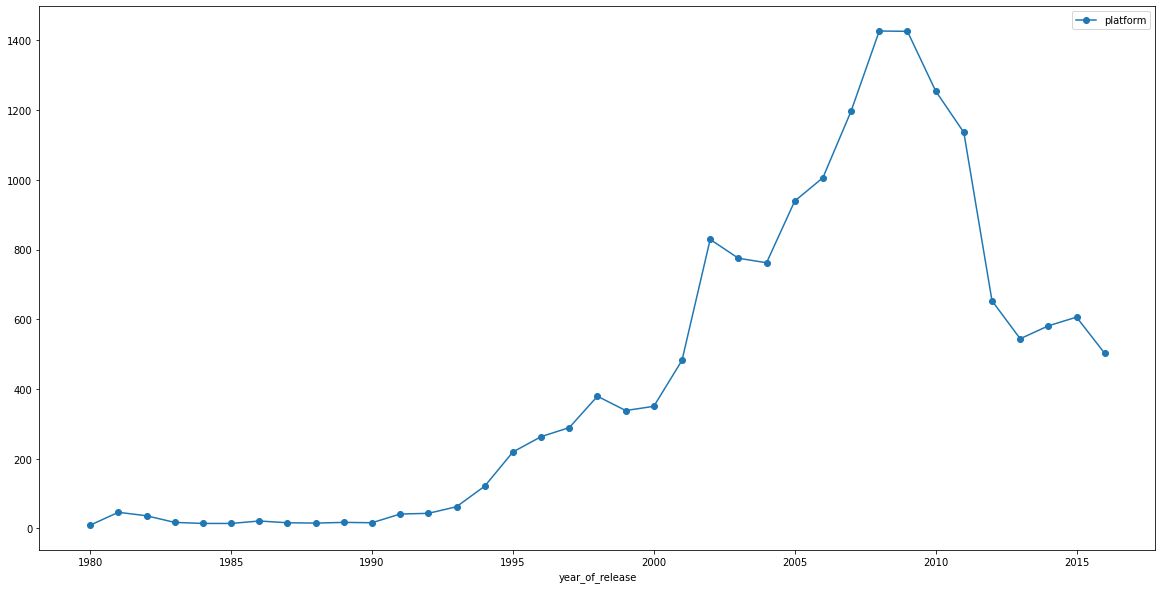

In [21]:
games_year_of_release.plot(style='-o',figsize = (20,10))

Aqui vemos como as vendas ocorreram por plataforma.  

In [22]:
games_plataform_vendas_1 = games.pivot_table(index='platform', values='total_vendas', aggfunc='sum').sort_values(by='total_vendas',ascending=False)
games_plataform_vendas_1

,total_vendas
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


<AxesSubplot:xlabel='platform'>

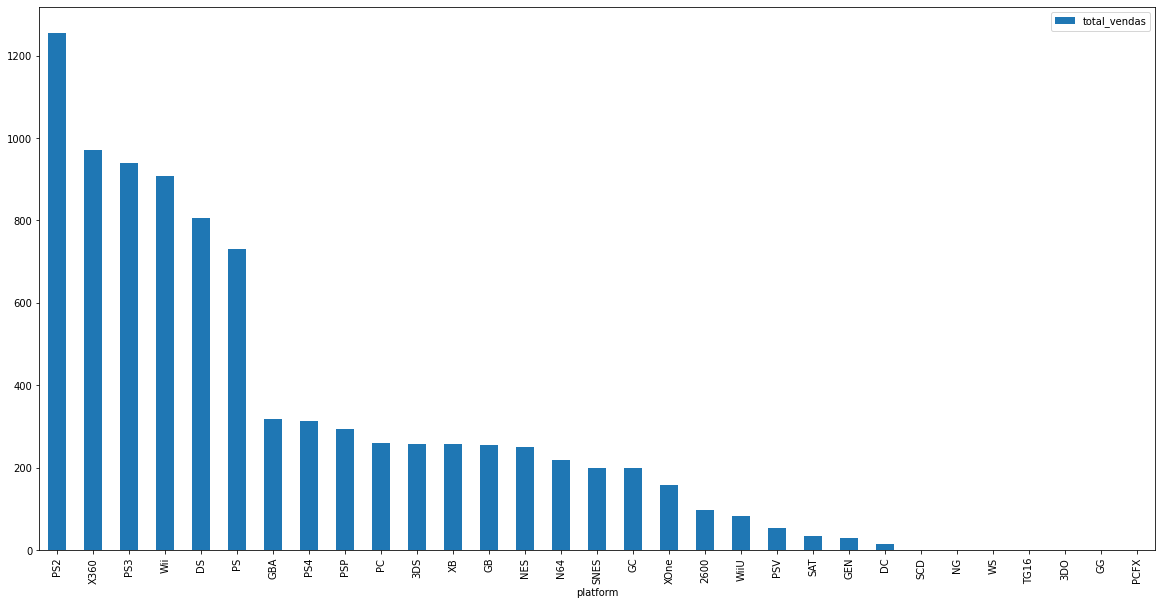

In [23]:
games_plataform_vendas_1.plot(kind='bar',figsize = (20,10))

Escolhi as plataformas que venderam mais de 200 milhões de USD.

In [24]:
games_plataform_vendas_1_top = games_plataform_vendas_1.query('total_vendas >200')
games_plataform_vendas_1_top                    

,total_vendas
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


<AxesSubplot:xlabel='platform'>

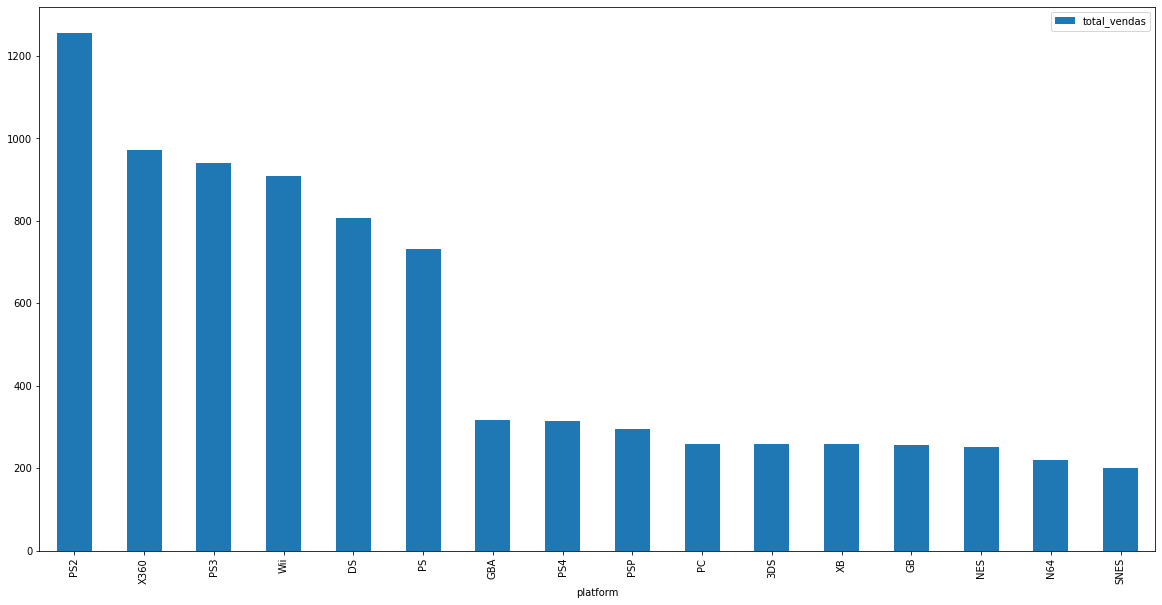

In [25]:
games_plataform_vendas_1_top.plot(kind='bar',figsize = (20,10))    

In [26]:
top_vendas_platform_index = games_plataform_vendas_1_top.index
top_vendas_platform_index 

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC',
       '3DS', 'XB', 'GB', 'NES', 'N64', 'SNES'],
      dtype='object', name='platform')

In [27]:
games.query('platform in @top_vendas_platform_index')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


Vemos nos próximos gráficos qual foi o comportamento das plataformas com maiores vendas ao longo dos anos. Nota-se que na média as plataformas lançam jogos por 10 anos (algumas pouco mais que isso, outras menos). Os primeiros lançamentos não vendem tanto, mas após uns 4 ou 5 anos os jogos lançados atingem um pico de receita. Os jogos lançados nos últimos anos da plataforma já não rendem tanto assim, pois os consumidores já preferem comprar jogos de plataformas mais modernas. 

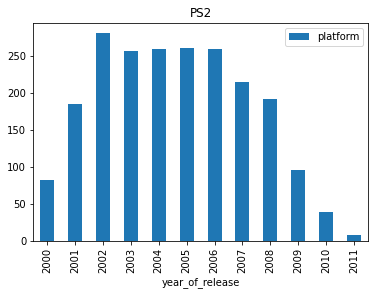

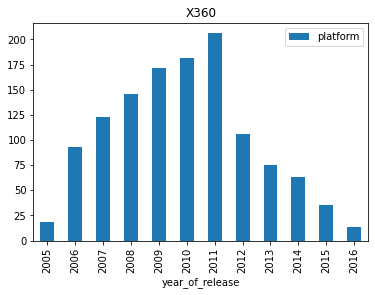

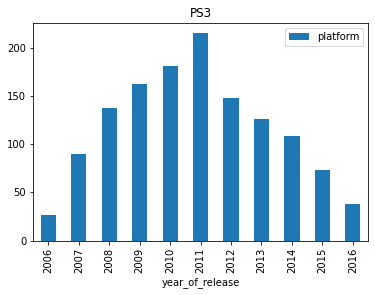

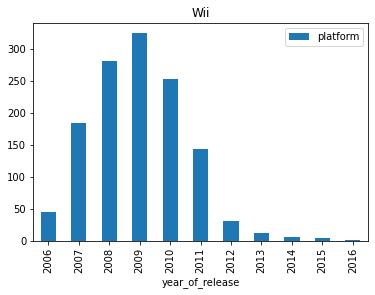

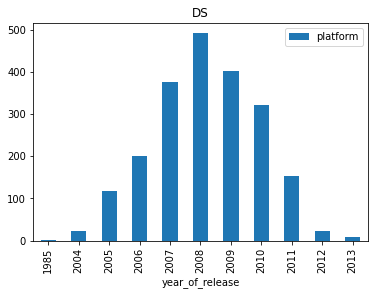

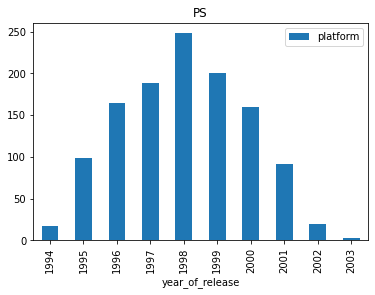

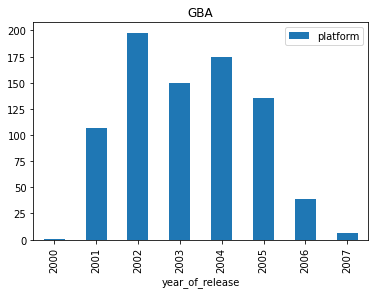

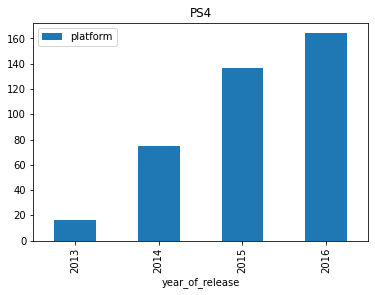

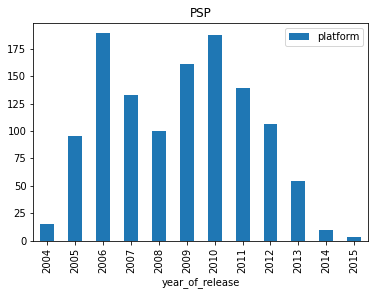

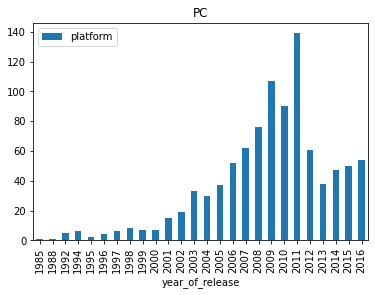

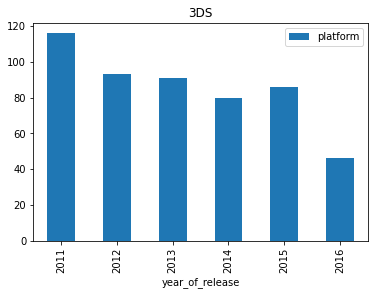

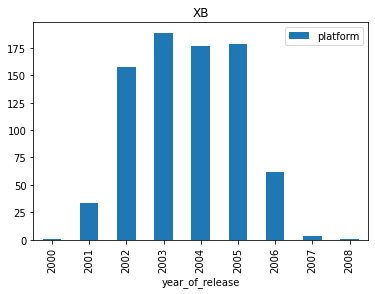

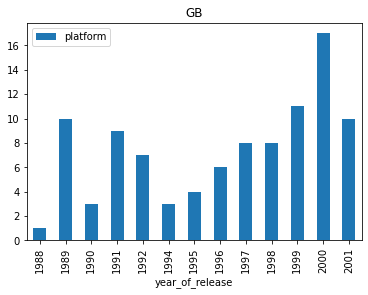

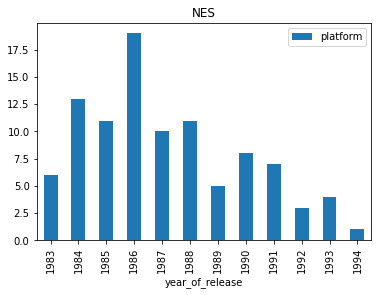

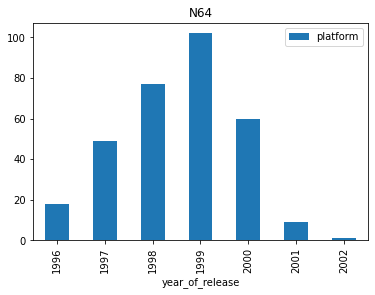

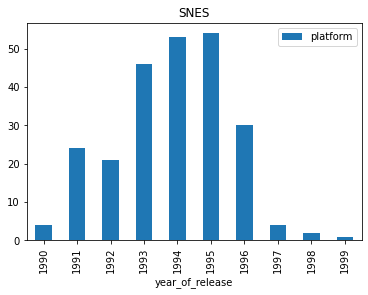

In [28]:
for x in top_vendas_platform_index:
    games.query('platform ==@x and year_of_release >0 ').pivot_table(index='year_of_release', values = 'platform', aggfunc='count').plot(kind='bar')
    plt.title(x)
    plt.show()

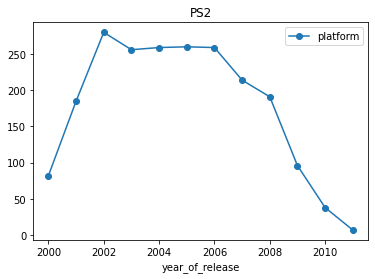

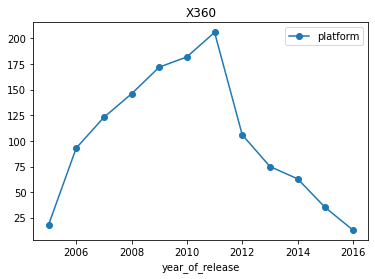

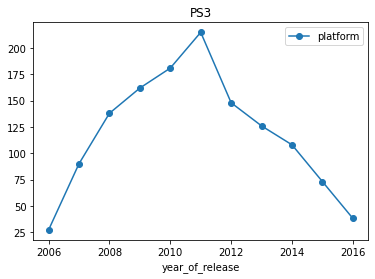

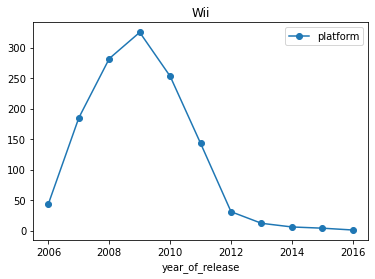

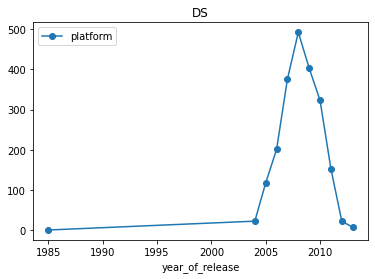

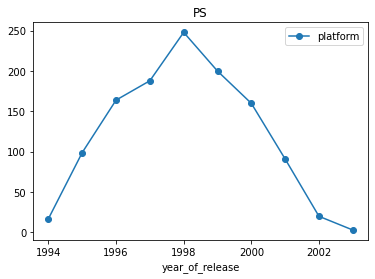

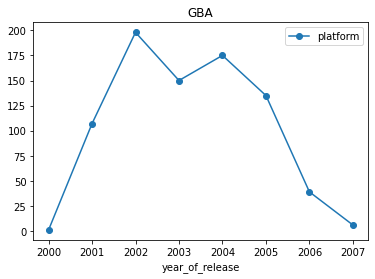

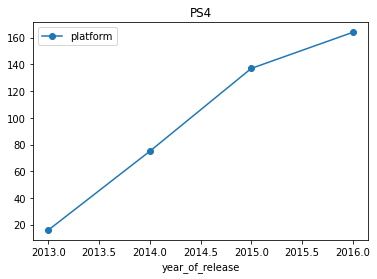

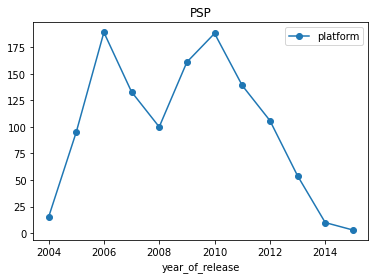

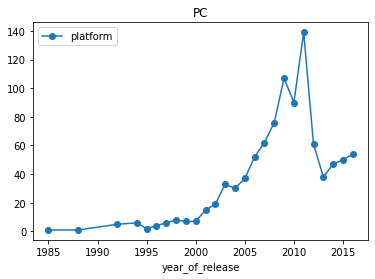

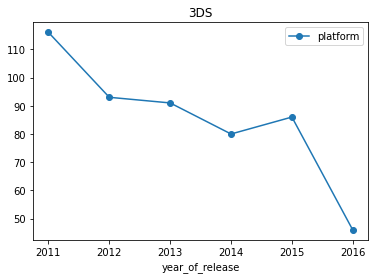

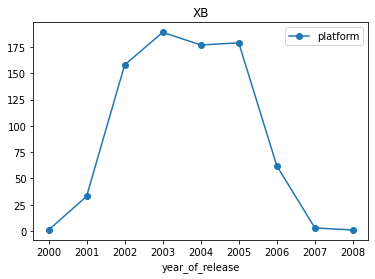

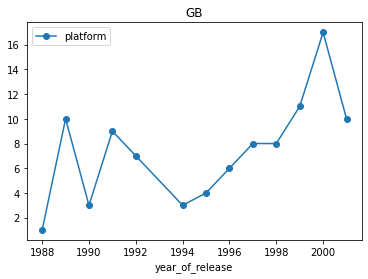

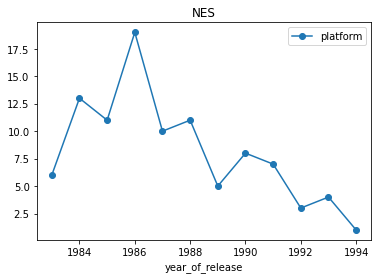

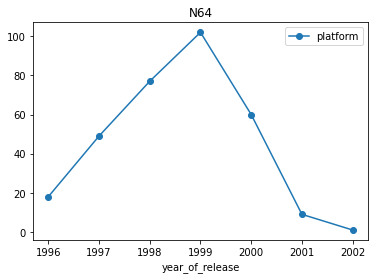

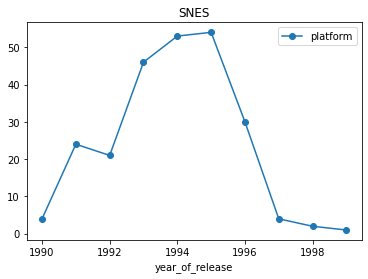

In [29]:
for x in top_vendas_platform_index:
    games.query('platform ==@x and year_of_release >0 ').pivot_table(index='year_of_release', values = 'platform', aggfunc='count').plot(style='-o')
    plt.title(x)
    plt.show()

In [30]:
games_plataform_vendas_1_index = games_plataform_vendas_1.index
games_plataform_vendas_1_index 

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC',
       '3DS', 'XB', 'GB', 'NES', 'N64', 'SNES', 'GC', 'XOne', '2600', 'WiiU',
       'PSV', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS', 'TG16', '3DO', 'GG',
       'PCFX'],
      dtype='object', name='platform')

Resolvi ver como é a distribuição em todas as plataformas, não só as que vendem mais. 

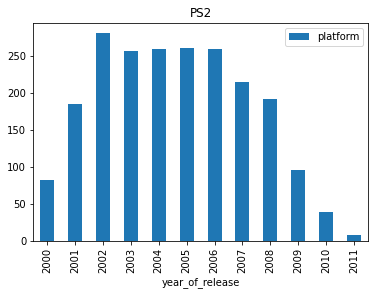

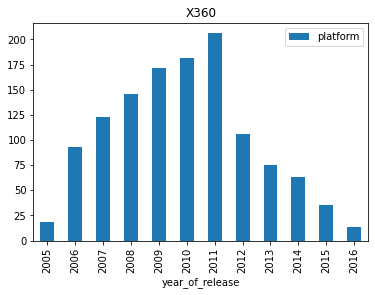

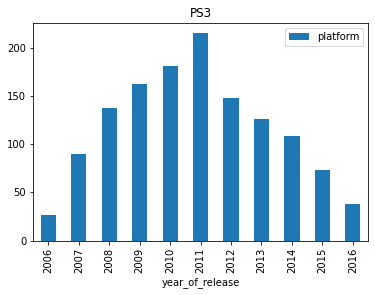

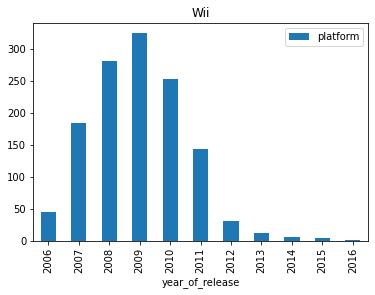

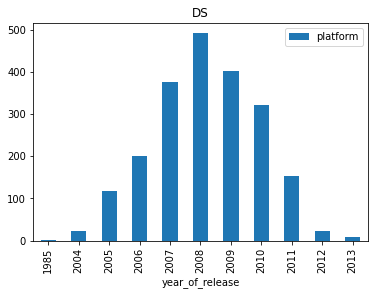

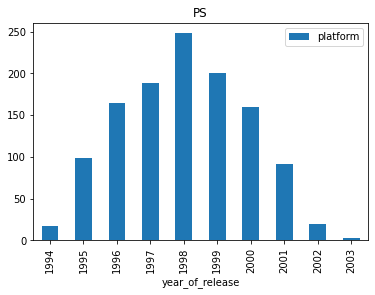

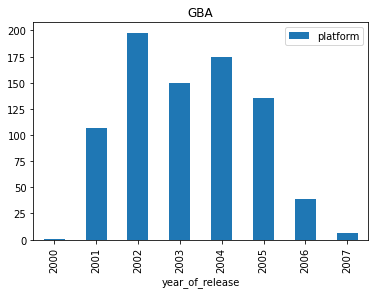

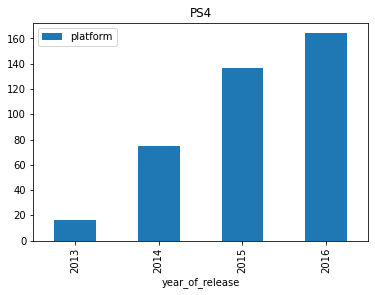

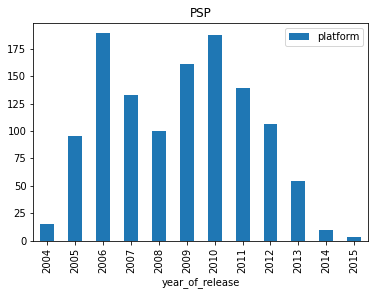

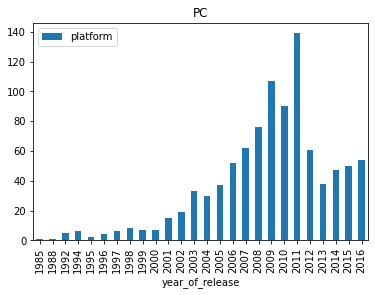

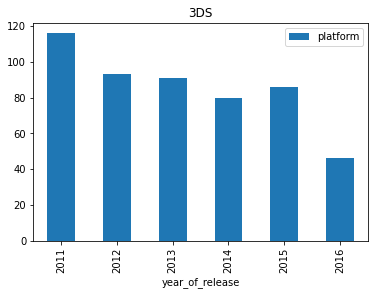

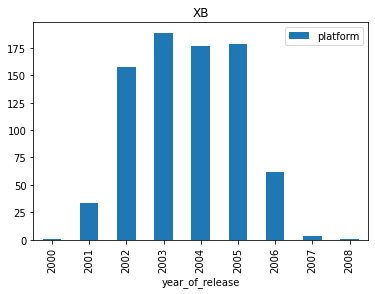

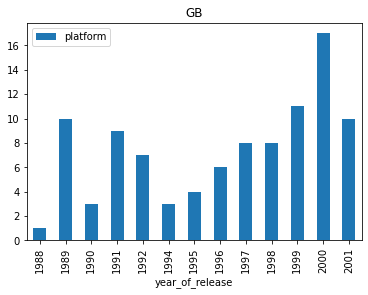

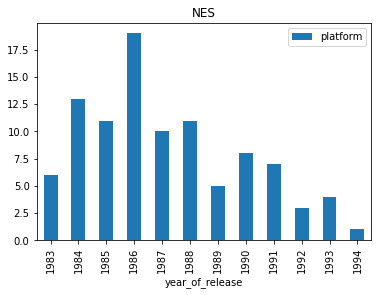

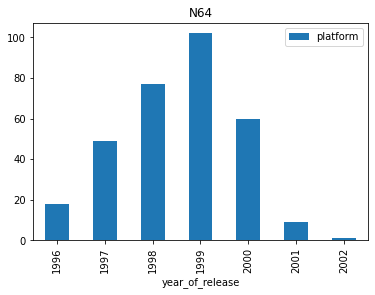

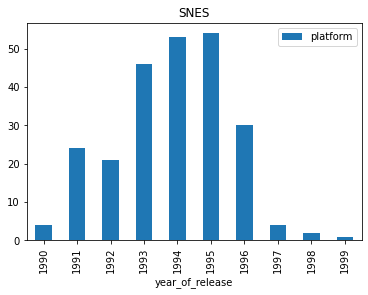

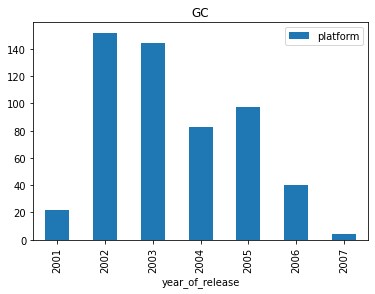

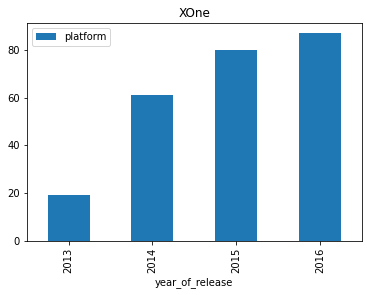

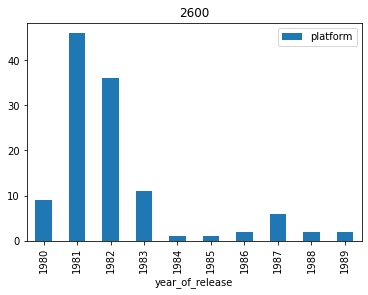

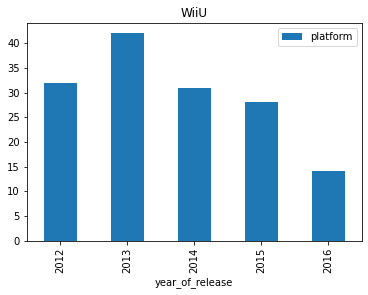

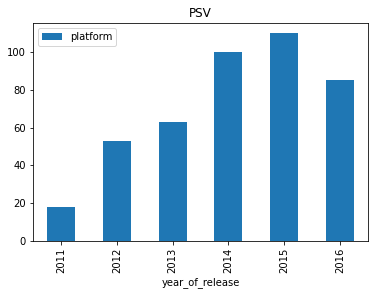

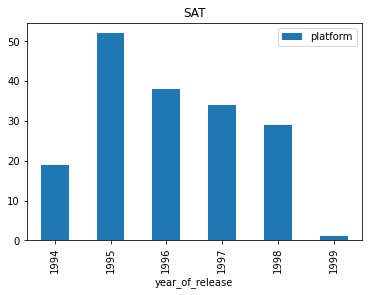

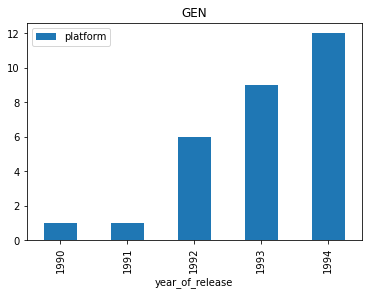

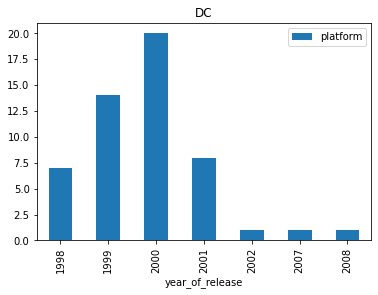

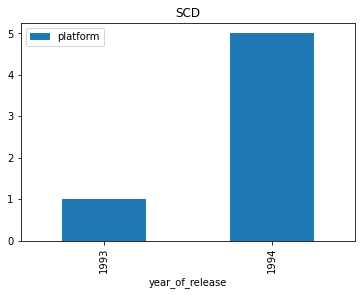

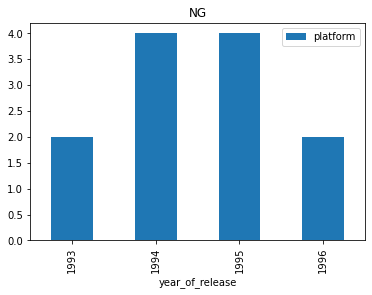

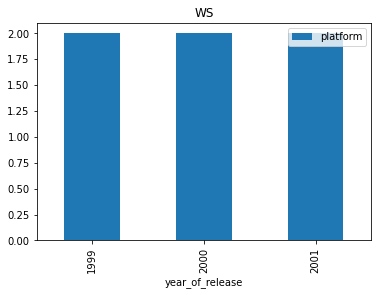

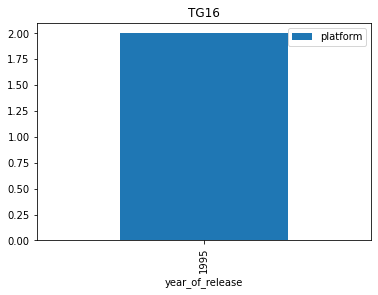

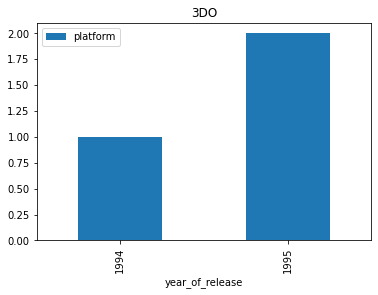

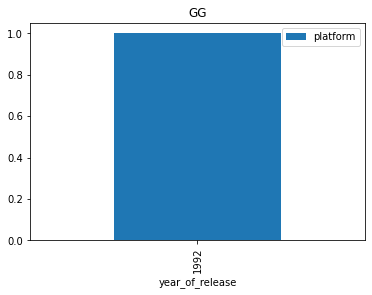

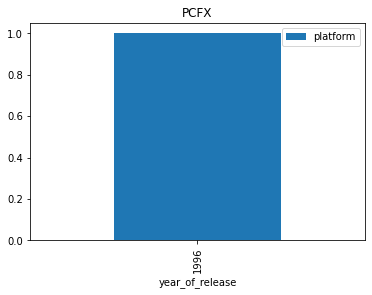

In [31]:
for x in games_plataform_vendas_1_index :
    games.query('platform ==@x and year_of_release >0 ').pivot_table(index='year_of_release', values = 'platform', aggfunc='count').plot(kind='bar')
    plt.title(x)
    plt.show()

In [32]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_vendas     16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


Nas próximas tabelas tentei ver se os valores nulos na coluna 'user_score' se relacionavam de alguma forma com o país onde jogo foi mais vendido. Não percebi nenhuma relação entre essas variáveis 

In [33]:
games_isna_score = games[games['user_score'].isna()]
games_isna_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [34]:
games_isna_score['year_of_release'].value_counts()

2009    812
2010    788
2008    766
2011    635
2007    568
2006    454
2002    365
2005    356
1998    348
2012    314
2015    309
1999    307
2004    273
1997    271
2003    259
1996    255
2014    252
2000    243
2013    240
2016    240
2001    225
1995    219
0       142
1994    120
1993     62
1981     46
1992     42
1991     41
1982     36
1986     21
1989     17
1983     17
1987     16
1990     16
1984     14
1988     14
1985     13
1980      9
Name: year_of_release, dtype: int64

<AxesSubplot:>

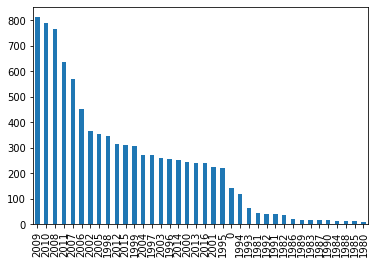

In [35]:
games_isna_score['year_of_release'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='year_of_release'>

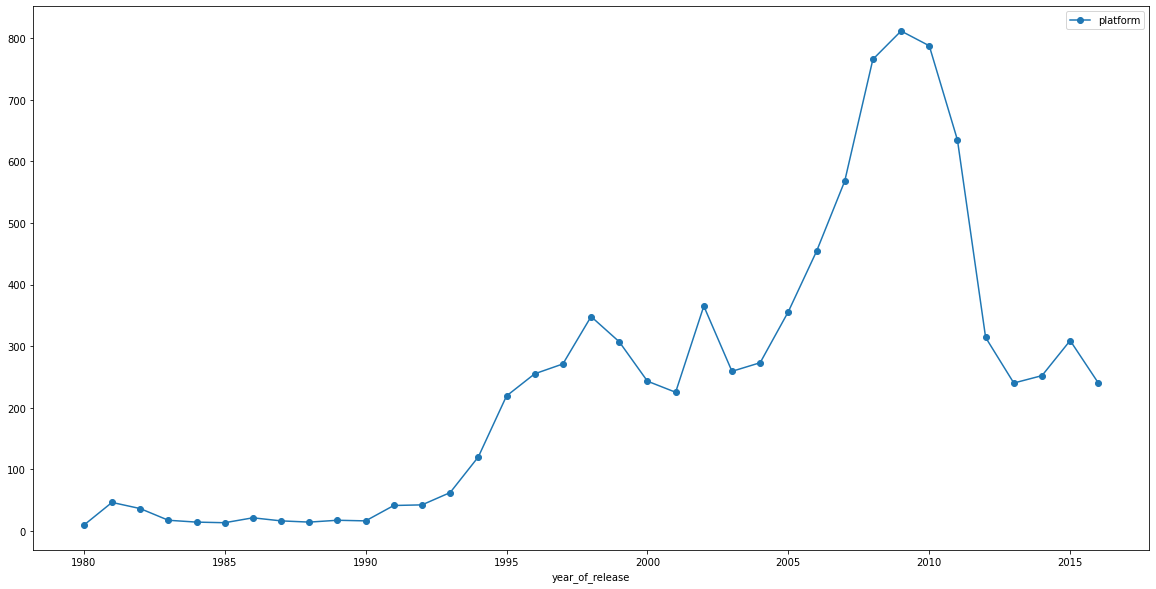

In [36]:
games_isna_score.query('year_of_release>0').pivot_table(index='year_of_release', values='platform',aggfunc='count').plot(style='-o',figsize=(20,10))

In [37]:
games[games['user_score'].isna()]['na_sales'].sum()

1549.91

In [38]:
games['na_sales'].sum()

4402.35

In [39]:
games[games['user_score'].isna()]['eu_sales'].sum()

717.73

In [40]:
games['eu_sales'].sum()

2424.67

In [41]:
games[games['user_score'].isna()]['jp_sales'].sum()

848.8599999999999

In [42]:
games['jp_sales'].sum()

1297.37

In [43]:
games[games['user_score'].isna()]['other_sales'].sum()

188.76000000000002

In [44]:
games['other_sales'].sum()

791.32

In [45]:
games_isna_score.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_vendas
year_of_release,1.000000,-0.002731,0.013858,0.015280,0.011395,0.027583,NaN,0.007101
na_sales,-0.002731,1.000000,0.642832,0.483127,0.498361,0.137309,NaN,0.923442
eu_sales,0.013858,0.642832,1.000000,0.473590,0.776218,0.160707,NaN,0.823385
jp_sales,0.015280,0.483127,0.473590,1.000000,0.310486,0.044823,NaN,0.709869
other_sales,0.011395,0.498361,0.776218,0.310486,1.000000,0.093591,NaN,0.650154
critic_score,0.027583,0.137309,0.160707,0.044823,0.093591,1.000000,NaN,0.161849
user_score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_vendas,0.007101,0.923442,0.823385,0.709869,0.650154,0.161849,NaN,1.000000


In [46]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<AxesSubplot:xlabel='year_of_release'>

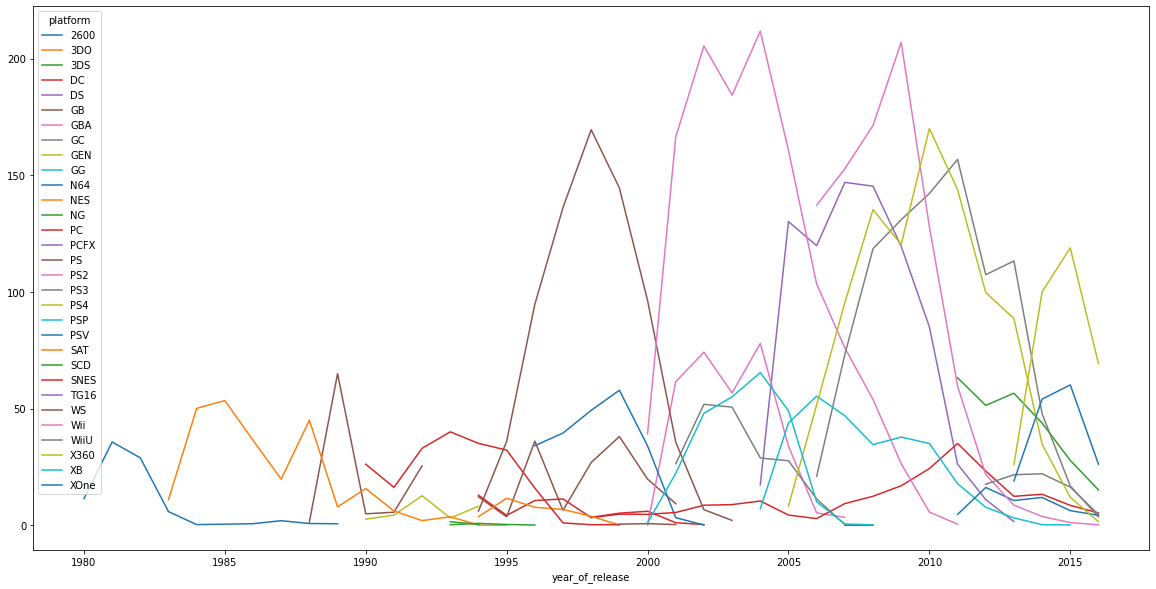

In [47]:
games.query('year_of_release >0').pivot_table(index='year_of_release', columns='platform',values='total_vendas',aggfunc='sum').plot(style='-',figsize=(20,10))

Analisando todas as tabelas e gráficos, ficou claro que quase todas as plataformas têm um ciclo de vida. Esse ciclo dura em torno de 10 anos, onde na primeira metade há um aumento gradual na receita das vendas dos jogos lançados até atingir um pico. Após atingir esse pico, os jogos lançados pela plataforma começam a apresentar receitas cada vez menores. Assim, novas plataformas surgem com jogos mais modernos. Como queremos estimar as vendas para 2017, não faz sentido levar para o modelo os jogos lançados a mais tempo. Por isso analisarei apenas jogos lançados após 2010, pois ainda estão dentro do período em que os jogos são mais vendidos. Todas as análises a seguir levaram em conta apenas jogos lançados após 2010.   

In [48]:
games_2010plus = games[games['year_of_release']>2010]
games_2010plus

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


De 2010 a 2016 a plataforma que mais vendeu foi PS3.

In [49]:
games_2010plus.pivot_table(index='platform',values='total_vendas',aggfunc='sum').sort_values(by='total_vendas',ascending=False)

,total_vendas
platform,
PS3,445.57
X360,380.38
PS4,314.14
3DS,257.81
XOne,159.32
PC,97.68
Wii,95.02
WiiU,82.19
PSV,53.81


In [50]:
games_2010plus.pivot_table(index='year_of_release',columns = 'platform', values='total_vendas',aggfunc='sum')

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2011,63.20,26.18,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN
2012,51.36,11.01,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [51]:
games_2010plus_index = games_2010plus.pivot_table(index='platform',values='total_vendas',aggfunc='sum').index
games_2010plus_index 

Index(['3DS', 'DS', 'PC', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU',
       'X360', 'XOne'],
      dtype='object', name='platform')

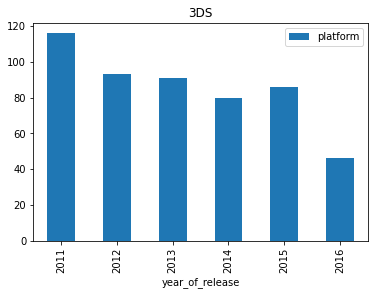

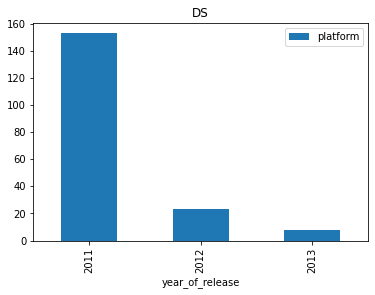

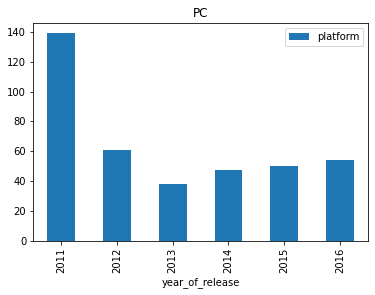

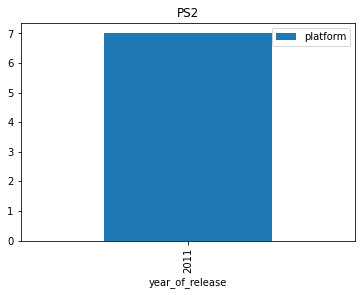

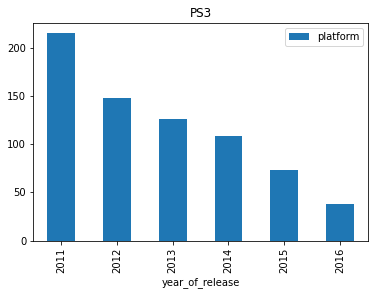

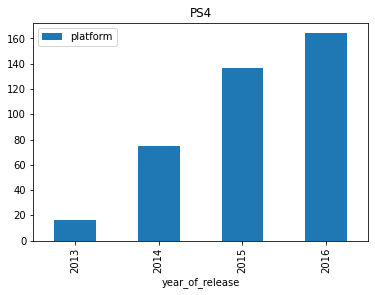

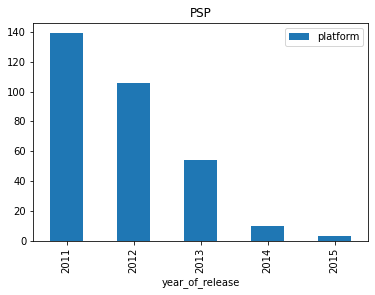

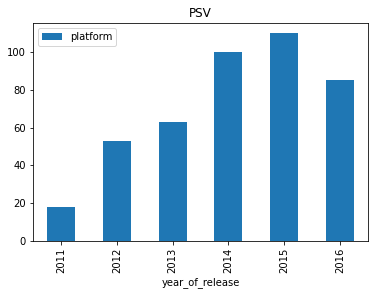

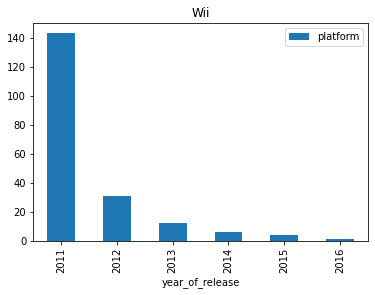

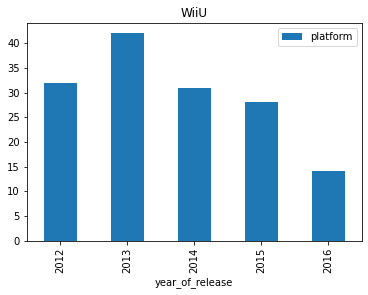

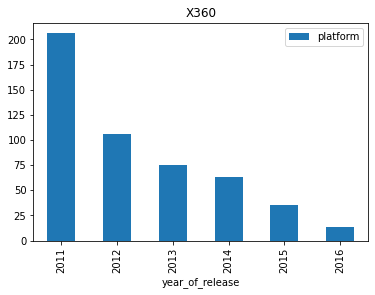

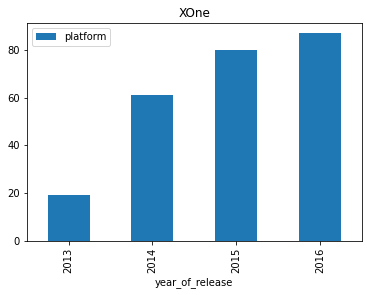

In [52]:
for x in games_2010plus_index:
    games_2010plus.query('platform ==@x').pivot_table(index='year_of_release', values = 'platform', aggfunc='count').plot(kind='bar')
    plt.title(x)
    plt.show()

Após apresentar os gráficos percebi que as plataformas DS, PS2, PS3, PSP, Wii e X360 costumavam ser populares, entretanto suas vendas caíram muito nos últimos anos. Já as plataformas XOne, WiiU, PSV, PS4, PC e 3DS vem crescendo suas vendas e são potencialmente mais lucrativas. 

In [53]:
pot_plat = ['XOne','WiiU','PSV','PS4','PC','3DS']
games_2010plus_potencial = games_2010plus.query('platform in @pot_plat')
games_2010plus_potencial

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


<AxesSubplot:title={'center':'total_vendas'}, xlabel='platform'>

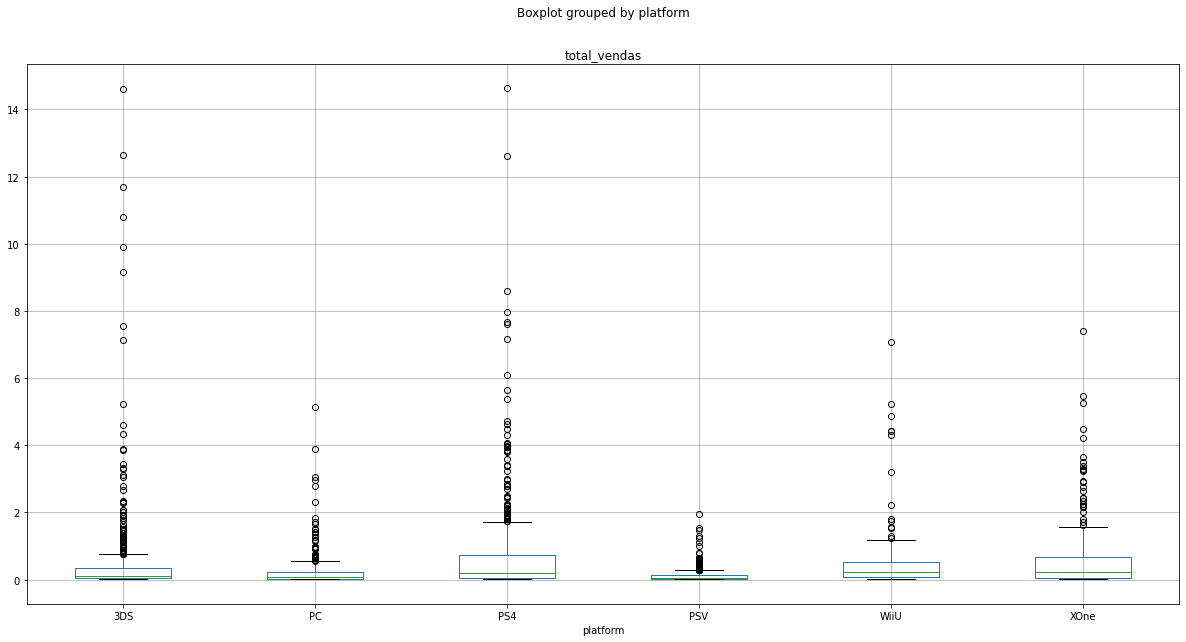

In [54]:
games_2010plus_potencial.boxplot(column = 'total_vendas',by='platform',figsize=(20,10))

In [55]:
games_2010plus_potencial[games_2010plus_potencial['platform']=="3DS"]['total_vendas'].quantile(0.25)

0.05

In [56]:
games_2010plus_potencial[(games_2010plus_potencial['platform']=="3DS")&(games_2010plus_potencial['total_vendas']<10)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
73,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,7.14
184,Tomodachi Life,3DS,2013,Simulation,0.97,2.11,1.90,0.24,NaN,NaN,NaN,5.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16648,Mushi Bugyou,3DS,2013,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16653,Nintendogs and Cats Golden Retriever and New F...,3DS,2011,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


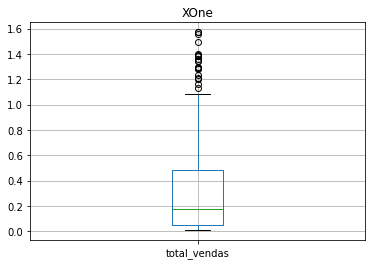

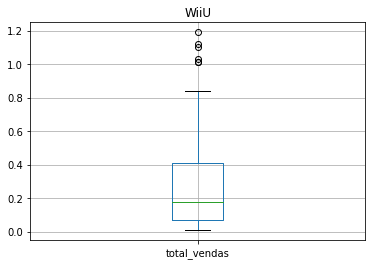

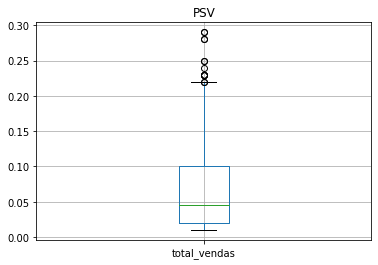

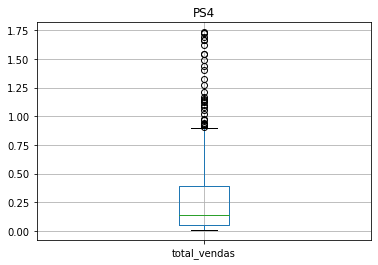

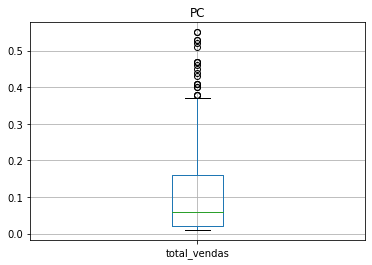

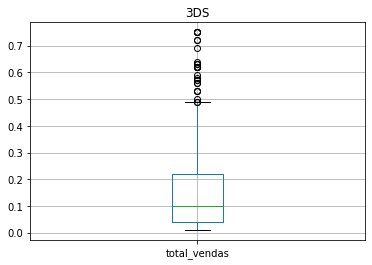

In [57]:
for a in pot_plat:
    q1=games_2010plus_potencial[games_2010plus_potencial['platform']==a]['total_vendas'].quantile(0.25)
    q3=games_2010plus_potencial[games_2010plus_potencial['platform']==a]['total_vendas'].quantile(0.75)
    IQR=q3-q1
    lim_sup_age = (q3 + 1.5*IQR)
    games_2010plus_potencial[(games_2010plus_potencial['platform']==a)&(games_2010plus_potencial['total_vendas']<=lim_sup_age)].boxplot('total_vendas')
    plt.title(a)
    plt.show()


Analisando os diagramas de caixa, pude perceber que as vendas do PS4 e XOne foi maior que a dos concorrentes. Tirando os valores atípicos as vendas médias ficaram mais próximas. 

Escolhi ps4 como uma plataforma popular para ponderar as avaliações de usuários e profissionais e seus reflexos nas vendas. Para isso, construí um gráfico de dispersão e calculei a correlação entre revisões e vendas. 

In [58]:
games_PS4 = games_2010plus_potencial.query('platform == "PS4"')
games_PS4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


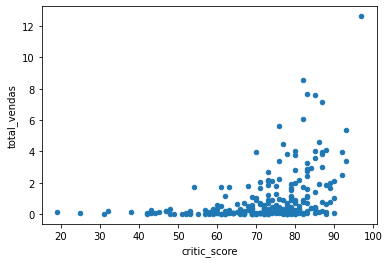

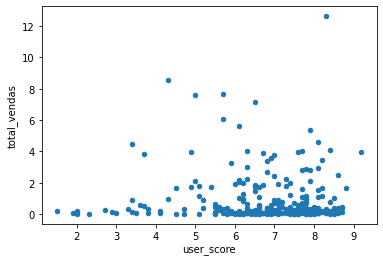

In [59]:
games_PS4.plot(x='critic_score',y='total_vendas',kind='scatter')
plt.show()
games_PS4.plot(x='user_score',y='total_vendas',kind='scatter')
plt.show()

In [60]:
games_PS4['user_score'].corr(games_PS4['total_vendas'])

-0.031957110204556424

In [61]:
games_PS4['total_vendas'].corr(games_PS4['critic_score'])

0.406567902061781

Correlação linear bem próxima de zero para 'user_score', mas acima de 40% para ‘critic_score’, sinalizando uma correlação linear bem maior. Pode-se perceber isso também graficamente.  

In [62]:
games_2010plus_potencial['name'].value_counts()

LEGO The Hobbit                              6
The LEGO Movie Videogame                     6
LEGO Marvel Super Heroes                     6
LEGO Jurassic World                          6
Terraria                                     6
                                            ..
Cars 2                                       1
Wii Fit U                                    1
Hasbro Family Fun Pack                       1
Hometown Story                               1
New Interpretation Stranger of Sword City    1
Name: name, Length: 1558, dtype: int64

In [63]:
games_2010plus_potencial.query('name=="LEGO Jurassic World"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
2301,LEGO Jurassic World,PS4,2015,Action,0.32,0.42,0.02,0.14,70.0,7.0,E10+,0.90
3084,LEGO Jurassic World,XOne,2015,Action,0.38,0.22,0.00,0.06,70.0,6.7,E10+,0.66
3230,LEGO Jurassic World,3DS,2015,Action,0.31,0.23,0.03,0.05,NaN,7.2,E10+,0.62
3840,LEGO Jurassic World,WiiU,2015,Action,0.27,0.19,0.02,0.04,71.0,8.1,E10+,0.52
7124,LEGO Jurassic World,PSV,2015,Action,0.05,0.13,0.00,0.05,NaN,7.6,E10+,0.23
13941,LEGO Jurassic World,PC,2015,Action,0.00,0.04,0.00,0.00,72.0,7.1,E10+,0.04


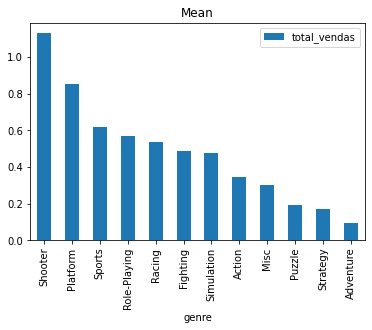

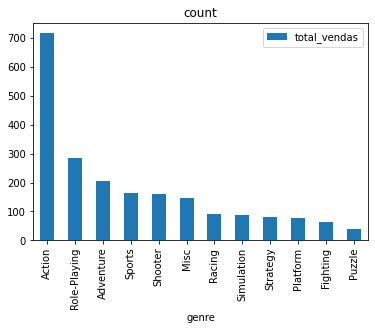

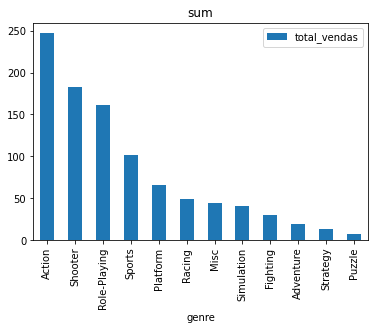

In [64]:
games_2010plus_potencial.pivot_table(index='genre',values='total_vendas',aggfunc='mean').sort_values(by='total_vendas',ascending=False).plot(kind='bar')
plt.title('Mean')
plt.show()

games_2010plus_potencial.pivot_table(index='genre',values='total_vendas',aggfunc='count').sort_values(by='total_vendas',ascending=False).plot(kind='bar')
plt.title('count')
plt.show()

games_2010plus_potencial.pivot_table(index='genre',values='total_vendas',aggfunc='sum').sort_values(by='total_vendas',ascending=False).plot(kind='bar')
plt.title('sum')
plt.show()

In [65]:
games_2010plus_potencial.pivot_table(index='genre',values='total_vendas',aggfunc='mean').sort_values(by='total_vendas',ascending=False)

,total_vendas
genre,
Shooter,1.129136
Platform,0.851429
Sports,0.618659
Role-Playing,0.568521
Racing,0.536304
Fighting,0.486825
Simulation,0.474253
Action,0.344324
Misc,0.303219


In [66]:
games_2010plus_potencial.pivot_table(index='genre',values='total_vendas',aggfunc='count').sort_values(by='total_vendas',ascending=False)

,total_vendas
genre,
Action,717
Role-Playing,284
Adventure,204
Sports,164
Shooter,162
Misc,146
Racing,92
Simulation,87
Strategy,80


In [67]:
games_2010plus_potencial.pivot_table(index='genre',values='total_vendas',aggfunc='sum').sort_values(by='total_vendas',ascending=False)

,total_vendas
genre,
Action,246.88
Shooter,182.92
Role-Playing,161.46
Sports,101.46
Platform,65.56
Racing,49.34
Misc,44.27
Simulation,41.26
Fighting,30.67


In [68]:
games_2010plus_potencial.pivot_table(index='genre',values='total_vendas',aggfunc=['mean','sum','count'])

,mean,sum,count
,total_vendas,total_vendas,total_vendas
genre,,,
Action,0.344324,246.88,717
Adventure,0.096275,19.64,204
Fighting,0.486825,30.67,63
Misc,0.303219,44.27,146
Platform,0.851429,65.56,77
Puzzle,0.190750,7.63,40
Racing,0.536304,49.34,92
Role-Playing,0.568521,161.46,284


In [69]:
games_2010plus_potencial.pivot_table(index='genre',values='total_vendas',aggfunc=['mean','sum','count']).columns

MultiIndex([( 'mean', 'total_vendas'),
            (  'sum', 'total_vendas'),
            ('count', 'total_vendas')],
           )

In [70]:
games_2010plus_potencial.pivot_table(index='genre',values='total_vendas',aggfunc=['mean','sum','count']).sort_values(by=('mean', 'total_vendas'),ascending=False)                                                                     
                                                                                                              

,mean,sum,count
,total_vendas,total_vendas,total_vendas
genre,,,
Shooter,1.129136,182.92,162
Platform,0.851429,65.56,77
Sports,0.618659,101.46,164
Role-Playing,0.568521,161.46,284
Racing,0.536304,49.34,92
Fighting,0.486825,30.67,63
Simulation,0.474253,41.26,87
Action,0.344324,246.88,717


In [71]:
games_2010plus_potencial.sort_values(by='total_vendas',ascending=False).head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
53,Super Mario 3D Land,3DS,2011,Platform,4.89,3.00,2.14,0.78,90.0,8.4,E,10.81
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
73,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


In [72]:
games.sort_values(by='total_vendas',ascending=False).head(30)['genre'].value_counts()

Platform        6
Role-Playing    5
Action          4
Sports          4
Misc            3
Racing          3
Puzzle          2
Shooter         2
Simulation      1
Name: genre, dtype: int64

Fazendo um recorte por gênero, vemos que os gêneros Shooter e Platform obtiveram uma receita média maior que os outros. Já os jogos de ação individualmente foram os que mais geraram receita, porque também foram os com o maior número de lançamentos. Entretanto é muito complicado generalizar em afirmar que um gênero é mais lucrativo que outro, já que analisando os 30 jogos com maior receita, vemos 9 tipos de gêneros diferentes.   

Comparando as cinco plataformas com maiores vendas em cada região, percebe-se que o PS4 lidera tanto nos USA quanto na EUR. Já no Japão a liderança fica com o 3DS, que por sua vez é a segunda mais vendida na EUR e terceira nos USA. As cinco plataformas mais vendidas nos USA e EUR são as mesmas, mudando apenas um pouco a ordem. Já no Japão a diferença está no PSV, segunda plataforma com mais vendas e que não está no top 5 das outras duas regiões. O fato de 3DS e PSV ocuparem a primeira e segunda posição no Japão sinaliza uma preferência dos japoneses pelos videogames portáteis.  

In [73]:
games_2010plus_potencial.pivot_table(index='platform',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False).head()

,na_sales
platform,
PS4,108.74
XOne,93.12
3DS,82.65
WiiU,38.10
PC,29.88


In [74]:
games_2010plus_potencial.pivot_table(index='platform',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).head()

,eu_sales
platform,
PS4,141.09
3DS,61.27
PC,56.70
XOne,51.59
WiiU,25.13


In [75]:
games_2010plus_potencial.pivot_table(index='platform',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False).head()

,jp_sales
platform,
3DS,100.62
PSV,21.84
PS4,15.96
WiiU,13.01
XOne,0.34


Comparando os cinco principais gêneros com maiores vendas em cada região, percebe-se uma semelhança bem grande entre USA e EUR. A única diferença é que Sports é o terceiro na Europa e quarto na américa do norte. Na Europa é o contrário. O Japão tem uma maior diferença. Já que por lá o gênero Role-Playing lidera as vendas. O gênero Misc é o quarto no Japão e nem aparece no top5 das outras duas regiões. 

In [76]:
games_2010plus_potencial.pivot_table(index='genre',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False).head()

,na_sales
genre,
Action,93.41
Shooter,81.82
Role-Playing,52.00
Sports,40.04
Platform,26.97


In [77]:
games_2010plus_potencial.pivot_table(index='genre',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).head()

,eu_sales
genre,
Action,90.21
Shooter,72.92
Sports,43.66
Role-Playing,42.91
Platform,22.30


In [78]:
games_2010plus_potencial.pivot_table(index='genre',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False).head()

,jp_sales
genre,
Role-Playing,54.19
Action,36.54
Platform,10.71
Misc,10.70
Simulation,10.64


Comparando as classificações do ESRB, percebe-se uma semelhança bem grande entre as regiões. Única diferença é que no Japão os jogos com classificação M são os terceiros com mais vendas. Na Europa e américa do Norte eles são os primeiros.

In [79]:
games_2010plus_potencial.pivot_table(index='rating',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)

,na_sales
rating,
M,112.22
E,81.14
T,47.85
E10+,44.89
RP,0.00


In [80]:
games_2010plus_potencial.pivot_table(index='rating',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)

,eu_sales
rating,
M,113.17
E,81.66
T,44.61
E10+,33.73
RP,0.03


In [81]:
games_2010plus_potencial.pivot_table(index='rating',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)

,jp_sales
rating,
E,29.76
T,16.50
M,9.28
E10+,8.32
RP,0.00


In [82]:
games_2010plus_potencial['platform'].value_counts()

3DS     512
PSV     429
PS4     392
PC      389
XOne    247
WiiU    147
Name: platform, dtype: int64

Vamos testar a hipótese de que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas. Minha alternativa H0 é de que as médias são iguais. A hipótese alternativa H1 é de que as médias são diferentes. 

In [83]:
alpha=0.05
alpha2=0.01

In [84]:
games_xone_user_score = games_2010plus_potencial[games_2010plus_potencial['platform']=='XOne']['user_score']
games_xone_user_score = games_xone_user_score[~games_xone_user_score.isna()]

In [85]:
games_pc_user_score = games_2010plus_potencial[games_2010plus_potencial['platform']=='PC']['user_score']
games_pc_user_score = games_pc_user_score[~games_pc_user_score.isna()]

In [86]:
th1= st.ttest_ind(games_xone_user_score,games_pc_user_score)

In [87]:
th1.pvalue

0.6267602271422398

In [88]:
if th1.pvalue < alpha:  
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

Nós não podemos rejeitar a hipótese nula


Nós não podemos rejeitar a hipótese nula, com alpha 0.05, de que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas. Chegamos a essa conclusão pois após fazermos o teste t entre as amostras, o p-valor ficou acima do alpha. Logo a probabilidade da hipótese nula (as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas) ser verdadeira é alta.

In [89]:
games_xone_user_score.mean()

6.521428571428572

In [90]:
games_pc_user_score.mean()

6.451791530944625

Vamos testar a hipótese As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes. Minha alternativa H0 é de que as médias são iguais. A hipótese alternativa H1 é de que as médias são diferentes. 

In [91]:
games_Action_user_score = games_2010plus_potencial[games_2010plus_potencial['genre']=='Action']['user_score']
games_Action_user_score = games_Action_user_score[~games_Action_user_score.isna()]
games_Action_user_score

42       8.3
165      7.9
231      8.1
235      8.4
295      6.3
        ... 
16584    7.9
16597    6.0
16652    8.5
16660    6.7
16692    7.6
Name: user_score, Length: 377, dtype: float64

In [92]:
games_Sports_user_score = games_2010plus_potencial[games_2010plus_potencial['genre']=='Sports']['user_score']
games_Sports_user_score = games_Sports_user_score[~games_Sports_user_score.isna()]
games_Sports_user_score

77       4.3
94       5.0
143      5.7
314      6.7
417      4.4
        ... 
16045    5.2
16120    6.3
16142    8.8
16518    1.4
16643    6.6
Name: user_score, Length: 120, dtype: float64

In [93]:
th2= st.ttest_ind(games_Action_user_score,games_Sports_user_score)


In [94]:
th2.pvalue

3.7279566072817166e-13

In [95]:
if th2.pvalue < alpha:  
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

Nós rejeitamos a hipótese nula


In [96]:
games_Sports_user_score.mean()

5.7175

In [97]:
games_Action_user_score.mean()

6.8270557029177725

Rejeitamos a hipótese nula, com alpha 0.05, de que as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são as mesmas. Chegamos a essa conclusão pois após fazermos o teste t entre as amostras, o p-valor ficou abaixo do alpha. Logo a probabilidade de a hipótese nula ser verdadeira é muito baixa. Assim aceitamos a hipótese alternativa de que as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes. 

Conclusão geral:
    Comecei fazendo algumas modificações no pré-processamento dos dados da tabela Games.
    Após alguns testes Não percebi nenhuma relação entre os valores nulos na coluna 'user_score', ’critic_score’ e ‘rating’ e as outras variáveis. 
    Minha primeira descoberta foi de que Apesar da amostra começar em 1980, somente em 1994 temos mais de 100 jogos lançados em um ano. A partir de 2002 esse número aumenta bastante (829) até chegar ao topo em 2008 (recorde de 1427 jogos). 
    Depois descobri as plataformas que venderam mais de USD 200 milhões no período analisado por ordem. 
    Cheguei à conclusão de que na média as plataformas lançam jogos por 10 anos (algumas pouco mais que isso, outras menos). Os primeiros lançamentos não vendem tanto, mas após uns 4 ou 5 anos os jogos lançados atingem um pico de receita. Os jogos lançados nos últimos anos da plataforma já não rendem tanto assim, pois os consumidores já preferem comprar jogos de plataformas mais modernas. Como queremos estimar as vendas para 2017, não faz sentido levar para o modelo os jogos lançados a mais tempo. Por isso analisarei apenas jogos lançados após 2010, pois ainda estão dentro do período em que os jogos são mais vendidos. Todas as análises a seguir levaram em conta apenas jogos lançados após 2010.   
    De 2010 a 2016 a plataforma que mais vendeu foi PS3. Após apresentar os gráficos percebi que as plataformas DS, PS2, PS3, PSP, Wii e X360 costumavam ser populares, entretanto suas vendas caíram muito nos últimos anos. Já as plataformas XOne, WiiU, PSV, PS4, PC e 3DS vem crescendo suas vendas e são potencialmente mais lucrativas.
    Analisando os diagramas de caixa, pude perceber que as vendas do PS4 e XOne foi maior que a dos concorrentes. Tirando os valores atípicos as vendas médias ficaram mais próximas.
    Escolhi ps4 como uma plataforma popular para ponderar as avaliações de usuários e profissionais e seus reflexos nas vendas. Para isso, construí um gráfico de dispersão e calculei a correlação entre revisões e vendas. Correlação linear bem próxima de zero para 'user_score', mas acima de 40% para ‘critic_score’, sinalizando uma correlação linear bem maior. Pode-se perceber isso também graficamente.
    Fazendo um recorte por gênero, vemos que os gêneros Shooter e Platform obtiveram uma receita média maior que os outros. Já os jogos de ação individualmente foram os que mais geraram receita, porque também foram os com o maior número de lançamentos. Entretanto é muito complicado generalizar em afirmar que um gênero é mais lucrativo que outro, já que analisando os 30 jogos com maior receita, vemos 9 tipos de gêneros diferentes.  
    Comparando as cinco plataformas com maiores vendas em cada região, percebe-se que o PS4 lidera tanto nos USA quanto na EUR. Já no Japão a liderança fica com o 3DS, que por sua vez é a segunda mais vendida na EUR e terceira nos USA. As cinco plataformas mais vendidas nos países da américa do norte e EUR são as mesmas, mudando apenas um pouco a ordem. Já no Japão a diferença está no PSV, segunda plataforma com mais vendas e que não está no top 5 das outras duas regiões. O fato de 3DS e PSV ocuparem a primeira e segunda posição no Japão sinaliza uma preferência dos japoneses pelos videogames portáteis.  
    Contrastando os cinco principais gêneros com maiores vendas em cada região, percebe-se uma semelhança bem grande entre USA e EUR. A única diferença é que Sports é o terceiro na Europa e quarto na américa do norte. Na Europa é o contrário. O Japão tem uma maior diferença. Já que por lá o gênero Role-Playing lidera as vendas. O gênero Misc é o quarto no Japão e nem aparece no top5 das outras duas regiões.
    Verificando as classificações do ESRB, percebe-se uma semelhança bem grande entre as regiões. Única diferença é que no Japão os jogos com classificação M são os terceiros com mais vendas. Na Europa e américa do Norte eles são os primeiros.
    Após realizar dois testes de hipótese, cheguei a conclusão de que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas e as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes. 
